In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Redes Neurais: Séries Temporais

Autor: Arthur Schneider Figueira

## Lendo as bibliotecas

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2023-11-20 17:55:06.641180: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 17:55:06.738712: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-20 17:55:07.117392: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 17:55:07.117416: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 17:55:07.119745: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# train = pd.read_table('./archive/2004-2021.tsv')
# train.tail()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120822,2021-04-25,2021-05-01,NORTE,TOCANTINS,OLEO DIESEL S10,18,R$/l,4.352,0.156,4.199,4.699,-99999.0,0.036,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [43]:
train = pd.read_csv('./energydata_complete.csv')
train.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.7,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.6,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784
19734,27-05-2016 18:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851


In [3]:
# # Convertendo a coluna 'DATA INICIAL' para o tipo datetime
# train['DATA INICIAL'] = pd.to_datetime(train['DATA INICIAL'])

# # Filtrando os dados para incluir apenas os registros a partir de 2013
# filtered_data = train[train['DATA INICIAL'] >= '2013-01-01']

In [45]:
# Convertendo a coluna 'DATA INICIAL' para o tipo datetime
train['date'] = pd.to_datetime(train['date'], format="%d-%m-%Y %H:%M")

# Filtrando os dados para incluir apenas os registros a partir de 2013
filtered_data = train

In [46]:
filtered_data.set_index('date', inplace=True)

In [49]:
filtered_data.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [53]:
filtered_data



,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117


In [54]:
filtered_data.index = pd.to_datetime(filtered_data.index)

In [55]:
# mask = filtered_data['Appliances'] < 0
# # mean_value = filtered_data.loc[~mask, 'Appliances'].mean()
# # filtered_data.loc[mask, 'Appliances'] = mean_value
# mask

In [56]:
cut_point = int(len(filtered_data) * 0.8)

In [57]:
train, test = filtered_data.iloc[:cut_point], filtered_data.iloc[cut_point:]


In [58]:
time_series_full = pd.concat([train,test])
time_series_full

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117


# Criando Defasagens (lags)

São valores passados da série temporal em relação ao valor atual. Para a base da temperatura, ela pode ser explicada com os dados umidade (humidity), velocidade do vento (wind speed) e pressão atmosférica média (mean pressure).

Entretanto, em muitos estudos de série temporal, não temos variáveis explicativas além da própria série alvo (histórico da variável resposta). Nesse cenário, usamos o próprio histórico da série como variável explicativa. Para isso, usamos observações anteriores para explicar o comportamento atual da série.

In [59]:
time_series_full['Appliances_1lag'] = [0]+list(time_series_full['Appliances'].values)[:-1]
time_series_full['Appliances_2lag'] = [0,0]+list(time_series_full['Appliances'].values)[:-2]
time_series_full['Appliances_3lag'] = [0,0,0]+list(time_series_full['Appliances'].values)[:-3]
time_series_full['Appliances_4lag'] = [0,0,0,0]+list(time_series_full['Appliances'].values)[:-4]
time_series_full['Appliances_5lag'] = [0,0,0,0,0]+list(time_series_full['Appliances'].values)[:-5]

In [60]:
time_series_full.head(7)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances_1lag,Appliances_2lag,Appliances_3lag,Appliances_4lag,Appliances_5lag
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.3,13.275433,13.275433,0,0,0,0,0
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.2,18.606195,18.606195,60,0,0,0,0
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.1,28.642668,28.642668,60,60,0,0,0
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.0,45.410390,45.410390,50,60,60,0,0
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.9,10.084097,10.084097,50,50,60,60,0
2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,5.333333,43.833333,4.8,44.919484,44.919484,60,50,50,60,60
2016-01-11 18:00:00,60,50,19.89,45.766667,19.2,44.500000,19.79,44.900000,18.890000,45.790000,...,5.000000,40.000000,4.7,47.233763,47.233763,50,60,50,50,60


**Contextualizando**
No dia 01/01/2013 (primeira linha), a temperatura era igual a 10.

Com uma defasagem, vamos usar a temperatura do dia 01/01/2013 para explicar a temperatura do próximo dia: 02/01/2013. Portanto, a coluna *meantemp_1lag* consta com o valor 10 (temperatura do dia 01/01/2013) no dia 02/01/2013. Afinal, a ideia consiste em usar a temperatura do dia anterior para explicar a temperatura da data atual (considerando a data atual sendo 02/01/2013).

É importante ressaltar que: **a quantidade de defasagem corresponde a quantidade de linhas da fonte de dados que vamos desconsiderar**. Note que na coluna meantemp_1lag, o primeiro valor é 0, pois não temos dados anteriores a 01/01/2013. Já na coluna *meantemp_5lag*, os 5 primeiros valores são 0, visto que não temos os dados dos primeiros 5 dias.

Logo, será necessário remover as 5 primeiras linhas da tabela, se optarmos por utilizar 5 defasagens como variáveis explicativas.

In [61]:
print(len(time_series_full))
time_series_full = time_series_full.loc[(time_series_full.Appliances_5lag > 0)]
print(len(time_series_full))

19735
19730


In [62]:
len(train.index)

15788

In [63]:
train = time_series_full.loc[(time_series_full.index.isin(train.index))]
train.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances_1lag,Appliances_2lag,Appliances_3lag,Appliances_4lag,Appliances_5lag
date,,,,,,,,,,,,,,,,,,,,,
2016-04-30 07:30:00,80,0,21.290000,37.266667,18.790000,40.40,22.79,37.200000,19.29,37.590000,...,1.0,40.0,4.45,46.209498,46.209498,60,50,50,60,40
2016-04-30 07:40:00,80,0,21.356667,37.660000,18.890000,40.59,22.73,36.926667,19.23,37.723333,...,1.0,40.0,4.50,32.651660,32.651660,80,60,50,50,60
2016-04-30 07:50:00,50,0,21.390000,37.950000,18.963333,40.53,22.60,36.433333,19.29,38.566667,...,1.0,40.0,4.55,6.571723,6.571723,80,80,60,50,50
2016-04-30 08:00:00,70,0,21.390000,38.000000,19.000000,40.29,22.60,36.560000,19.29,38.700000,...,1.0,40.0,4.60,3.177356,3.177356,50,80,80,60,50
2016-04-30 08:10:00,300,0,21.390000,38.393333,19.000000,40.29,22.60,36.500000,19.29,38.760000,...,1.0,40.0,4.57,31.592388,31.592388,70,50,80,80,60


In [64]:
test = time_series_full.loc[(time_series_full.index.isin(test.index))]
test.tail()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances_1lag,Appliances_2lag,Appliances_3lag,Appliances_4lag,Appliances_5lag
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,3.333333,23.666667,13.3,43.096812,43.096812,90,110,120,180,220
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,3.500000,24.500000,13.3,49.282940,49.282940,100,90,110,120,180
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,3.666667,25.333333,13.3,29.199117,29.199117,90,100,90,110,120
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,3.833333,26.166667,13.2,6.322784,6.322784,270,90,100,90,110
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,4.000000,27.000000,13.2,34.118851,34.118851,420,270,90,100,90


In [65]:
test.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'Appliances_1lag', 'Appliances_2lag',
       'Appliances_3lag', 'Appliances_4lag', 'Appliances_5lag'],
      dtype='object')

# Modelagem de Séries Temporais

### Rede Neural LSTM

A arquitetura LSTM de rede neural funciona a partir das unidades. Cada unidade é como se fosse um neurônio que é conectado ao outro de maneira sequencial:

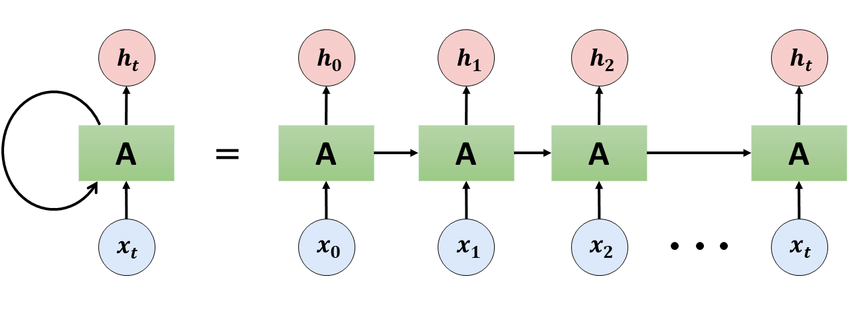

No exemplo acima, a gente compreende o motivo dessa rede ser Recorrente. Ou seja, o primeiro neurônio recebe uma entrada e gera uma saída. Essa saída é utilizada pelo neurônio seguinte, ao longo do tempo.

A arquitetura LSTM usa esse princípio combinando com particularidades extra:

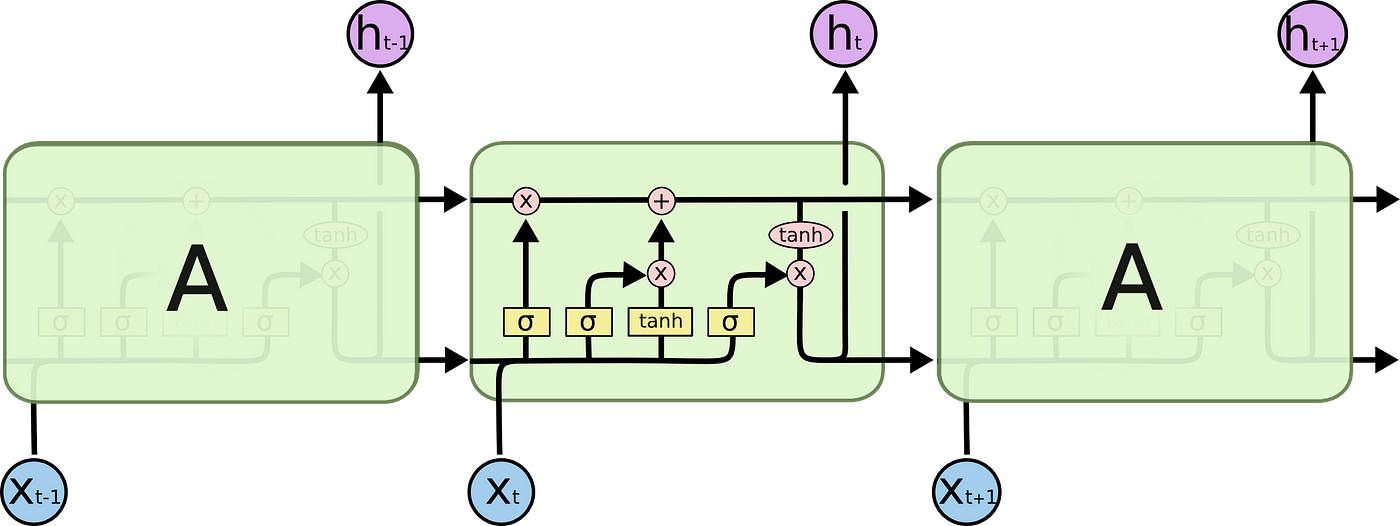

Na imagem acima, temos o seguinte exemplo:

O "X" do tempo anterior (t-1) é a entrada da unidade. Há a arquitetura da rede neural LSTM que analisa a entrada e gera 3 saídas. h(t-1) e mais duas saídas. A saída h (t-1) é uma parte do conhecimento da rede neural que será descartada. Já as outras duas saídas representadas pelas setas, seguem conectadas a próxima unidade da rede neural que vai receber a variável X (t). Portanto, é importante notar que além de receber a variável X no momento posterior, esse neurônio/unidade recebe também a experiência obtida no momento anterior (t-1).

Se observarmos uma unidade isoladamente, fica claro o que é recebido, "esquecido" e passado para a próxima unidade:

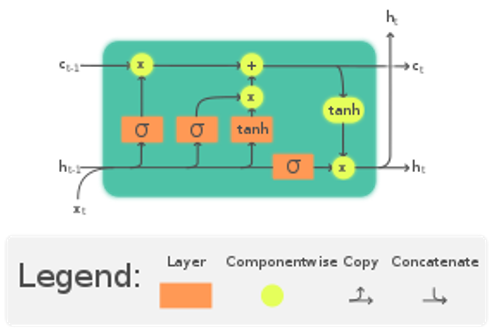

* Ct-1: é o output gerado pela unidade anterior e é aproveitado pela unidade atual;
* Ht-1: é o output gerado pela unidade anterior que é vinculado ao X atual e analisado pela unidade atual;
* H t: é o conhecimento gerado pela unidade. Uma parte dele é esquecido e outra parte é levada adiante;
* C t: é outro output gerado pela unidade LSTM que será utilizado na próxima unidade;
* A parte laranja são funções de ativação. Tangentes e sigmoids.
* A parte amarela envolve os vetores com valores e uma função de ativação tangente.

In [66]:
# Passo 1: separando X e Y e normalizando os dados

X = train[['Appliances_1lag',	'Appliances_2lag',	'Appliances_3lag',	'Appliances_4lag',	'Appliances_5lag']]
y = train["Appliances"]

# Normalização dos dados
# Normalize os dados (opcional, mas pode melhorar o desempenho da rede)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Converta os dados para o formato 3D esperado pela LSTM (samples, timesteps, features)
# Nesse caso, como temos apenas uma variável explicativa (3 features), definimos timesteps = 1.
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [67]:
len(X),len(y)

(15783, 15783)

In [68]:
X_lstm.shape #1462 linhas na base, por 1 data, com 3 variáveis explicativas em cada data

(15783, 1, 5)

### LSTM: Modelo 1

In [69]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model1 = Sequential()
model1.add(LSTM(units=50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model1.add(Dense(units=1))

# Passo 3: Compile o modelo

model1.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history1 = model1.fit(X_lstm, y_scaled, epochs=200, batch_size=32)

Epoch 1/200


494/494 [==============================] - 1s 632us/step - loss: 0.0056
Epoch 2/200
494/494 [==============================] - 0s 657us/step - loss: 0.0041
Epoch 3/200
494/494 [==============================] - 0s 657us/step - loss: 0.0040
Epoch 4/200
494/494 [==============================] - 0s 658us/step - loss: 0.0039
Epoch 5/200
494/494 [==============================] - 0s 581us/step - loss: 0.0039
Epoch 6/200
494/494 [==============================] - 0s 610us/step - loss: 0.0039
Epoch 7/200
494/494 [==============================] - 0s 639us/step - loss: 0.0039
Epoch 8/200
494/494 [==============================] - 0s 621us/step - loss: 0.0039
Epoch 9/200
494/494 [==============================] - 0s 601us/step - loss: 0.0039
Epoch 10/200
494/494 [==============================] - 0s 618us/step - loss: 0.0039
Epoch 11/200
494/494 [==============================] - 0s 607us/step - loss: 0.0039
Epoch 12/200
494/494 [==============================] - 0s 626us/step - loss: 0.0039
E

### LSTM: Modelo 2

In [70]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model2 = Sequential()
model2.add(LSTM(units=100, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model2.add(Dense(units=1))

# Passo 3: Compile o modelo

model2.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history2 = model2.fit(X_lstm, y_scaled, epochs=200, batch_size=32)

Epoch 1/200


494/494 [==============================] - 1s 694us/step - loss: 0.0051
Epoch 2/200
494/494 [==============================] - 0s 660us/step - loss: 0.0040
Epoch 3/200
494/494 [==============================] - 0s 683us/step - loss: 0.0039
Epoch 4/200
494/494 [==============================] - 0s 637us/step - loss: 0.0039
Epoch 5/200
494/494 [==============================] - 0s 693us/step - loss: 0.0039
Epoch 6/200
494/494 [==============================] - 0s 700us/step - loss: 0.0039
Epoch 7/200
494/494 [==============================] - 0s 707us/step - loss: 0.0039
Epoch 8/200
494/494 [==============================] - 0s 663us/step - loss: 0.0039
Epoch 9/200
494/494 [==============================] - 0s 670us/step - loss: 0.0039
Epoch 10/200
494/494 [==============================] - 0s 717us/step - loss: 0.0039
Epoch 11/200
494/494 [==============================] - 0s 652us/step - loss: 0.0038
Epoch 12/200
494/494 [==============================] - 0s 700us/step - loss: 0.0039
E

### LSTM: Modelo 3

In [109]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model3 = Sequential()
model3.add(LSTM(units=100, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model3.add(Dense(units=1))

# Passo 3: Compile o modelo

model3.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history3 = model3.fit(X_lstm, y_scaled, epochs=200, batch_size=128)

Epoch 1/200
124/124 [==============================] - 1s 903us/step - loss: 0.0066
Epoch 2/200
124/124 [==============================] - 0s 854us/step - loss: 0.0044
Epoch 3/200
124/124 [==============================] - 0s 853us/step - loss: 0.0041
Epoch 4/200
124/124 [==============================] - 0s 825us/step - loss: 0.0040
Epoch 5/200
124/124 [==============================] - 0s 928us/step - loss: 0.0039
Epoch 6/200
124/124 [==============================] - 0s 936us/step - loss: 0.0039
Epoch 7/200
124/124 [==============================] - 0s 951us/step - loss: 0.0039
Epoch 8/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 9/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 10/200
124/124 [==============================] - 0s 819us/step - loss: 0.0039
Epoch 11/200
124/124 [==============================] - 0s 808us/step - loss: 0.0038
Epoch 12/200
124/124 [==============================] - 0s 886us/step - loss: 

In [72]:
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Dropout
# from keras.optimizers import Adam
# from keras.regularizers import l1_l2
# from keras.callbacks import LearningRateScheduler
# import numpy as np

# # Função para ajustar a taxa de aprendizado durante o treinamento
# def scheduler(epoch, lr):
#     if epoch < 50:
#         return lr
#     else:
#         return lr * np.exp(-0.1)

# # Passo 1: Defina o modelo com regularização e função de ativação apropriada para LSTM
# model3 = Sequential()
# model3.add(LSTM(units=100, activation='tanh', input_shape=(X_lstm.shape[1], X_lstm.shape[2]),
#                 kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
#                 bias_initializer='zeros', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4),
#                 recurrent_regularizer=l1_l2(l1=1e-5, l2=1e-4), return_sequences=False))
# model3.add(Dropout(0.2))
# model3.add(Dense(units=1, activation='relu'))  # Garante que a saída seja não-negativa

# # Passo 2: Compile o modelo com um otimizador que tenha uma taxa de aprendizado adaptativa
# optimizer = Adam(learning_rate=0.001)
# model3.compile(loss='mean_squared_error', optimizer=optimizer)

# # Passo 3: Defina o callback do LearningRateScheduler
# lr_scheduler = LearningRateScheduler(scheduler)

# # Passo 4: Treine o modelo com o callback
# history3 = model3.fit(X_lstm, y_scaled, epochs=200, batch_size=128, callbacks=[lr_scheduler])

# # Nota: Certifique-se de que as variáveis X_lstm e y_scaled estejam definidas e preparadas para treinamento.

Epoch 1/200
124/124 [==============================] - 1s 1ms/step - loss: 0.0155 - lr: 0.0010
Epoch 2/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0053 - lr: 0.0010
Epoch 3/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0047 - lr: 0.0010
Epoch 4/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0046 - lr: 0.0010
Epoch 5/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0045 - lr: 0.0010
Epoch 6/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0045 - lr: 0.0010
Epoch 7/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0045 - lr: 0.0010
Epoch 8/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0044 - lr: 0.0010
Epoch 9/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0044 - lr: 0.0010
Epoch 10/200
124/124 [==============================] - 0s 1ms/step - loss: 0.0044 - lr: 0.0010
Epoch 11/200
124/124 [===========================

### Comparando a Loss

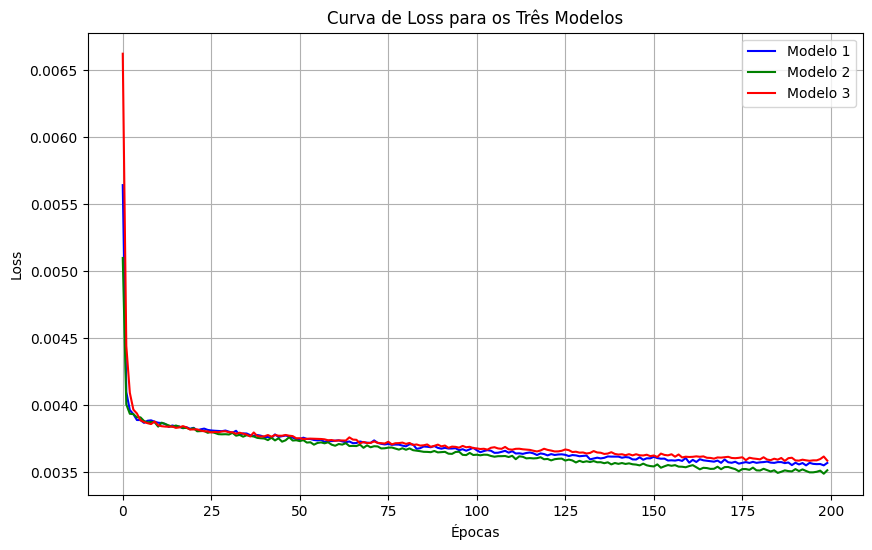

In [110]:
# Supondo que você tenha os objetos "history1", "history2" e "history3", que contêm informações sobre o treinamento dos três modelos.

# Plotando as curvas de loss
plt.figure(figsize=(10, 6))

plt.plot(history1.history['loss'], label='Modelo 1', color='blue')
plt.plot(history2.history['loss'], label='Modelo 2', color='green')
plt.plot(history3.history['loss'], label='Modelo 3', color='red')

plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de Loss para os Três Modelos')
plt.legend()
plt.grid(True)
plt.show()

### Avaliando a base de teste

In [111]:
# Passo 1: Pré-processamento dos novos dados de teste

# Divida os dados em variáveis de entrada (X) e variável de saída (y), similar ao que você fez para os dados de treinamento.
X_test = test[['Appliances_1lag',	'Appliances_2lag',	'Appliances_3lag',	'Appliances_4lag',	'Appliances_5lag']]

# Normalize os dados usando o mesmo scaler que você usou para os dados de treinamento.
X_test_scaled = scaler_X.transform(X_test)

# Converta os dados para o formato 3D esperado pela LSTM
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Passo 2: Fazer previsões com o modelo LSTM

# Use o método predict para fazer as previsões
y_pred_scaled1 = model1.predict(X_test_lstm)
y_pred_scaled2 = model2.predict(X_test_lstm)
y_pred_scaled3 = model3.predict(X_test_lstm)

# Como o modelo retorna as previsões em escala, desfaça a normalização para obter as previsões reais
y_pred1 = scaler_y.inverse_transform(y_pred_scaled1)
y_pred2 = scaler_y.inverse_transform(y_pred_scaled2)
y_pred3 = scaler_y.inverse_transform(y_pred_scaled3)

  1/124 [..............................] - ETA: 1s

124/124 [==============================] - 0s 442us/step


In [112]:
# Calcule o RMSE para cada modelo
rmse_model1 = np.sqrt(np.mean((np.array(test['Appliances']) - y_pred1) ** 2))
rmse_model2 = np.sqrt(np.mean((np.array(test['Appliances']) - y_pred2) ** 2))
rmse_model3 = np.sqrt(np.mean((np.array(test['Appliances']) - y_pred3) ** 2))

print('RMSE Modelo 1:', rmse_model1)
print('RMSE Modelo 2:', rmse_model2)
print('RMSE Modelo 3:', rmse_model3)

RMSE Modelo 1: 118.69181685848908
RMSE Modelo 2: 117.02068104693876
RMSE Modelo 3: 116.14179317789498


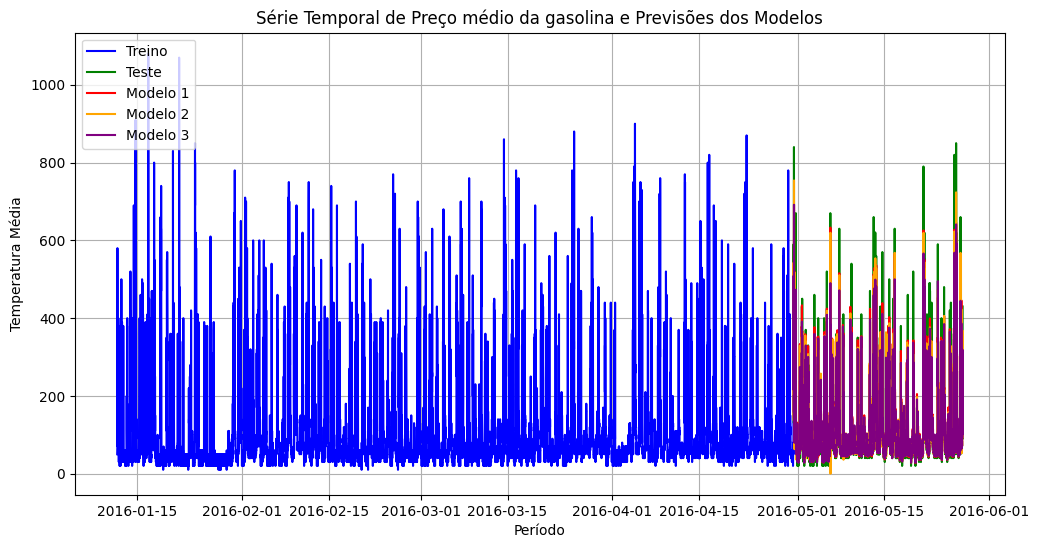

In [113]:
# Plotando a série temporal da coluna "value" da base de treino e teste
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Appliances'], label='Treino', color='blue')
plt.plot(test.index, test['Appliances'], label='Teste', color='green')

# Plotando as previsões dos modelos em cores diferentes
plt.plot(test.index, y_pred1, label='Modelo 1', color='red')
plt.plot(test.index, y_pred2, label='Modelo 2', color='orange')
plt.plot(test.index, y_pred3, label='Modelo 3', color='purple')

plt.xlabel('Período')
plt.ylabel('Temperatura Média')
plt.title('Série Temporal de Preço médio da gasolina e Previsões dos Modelos')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

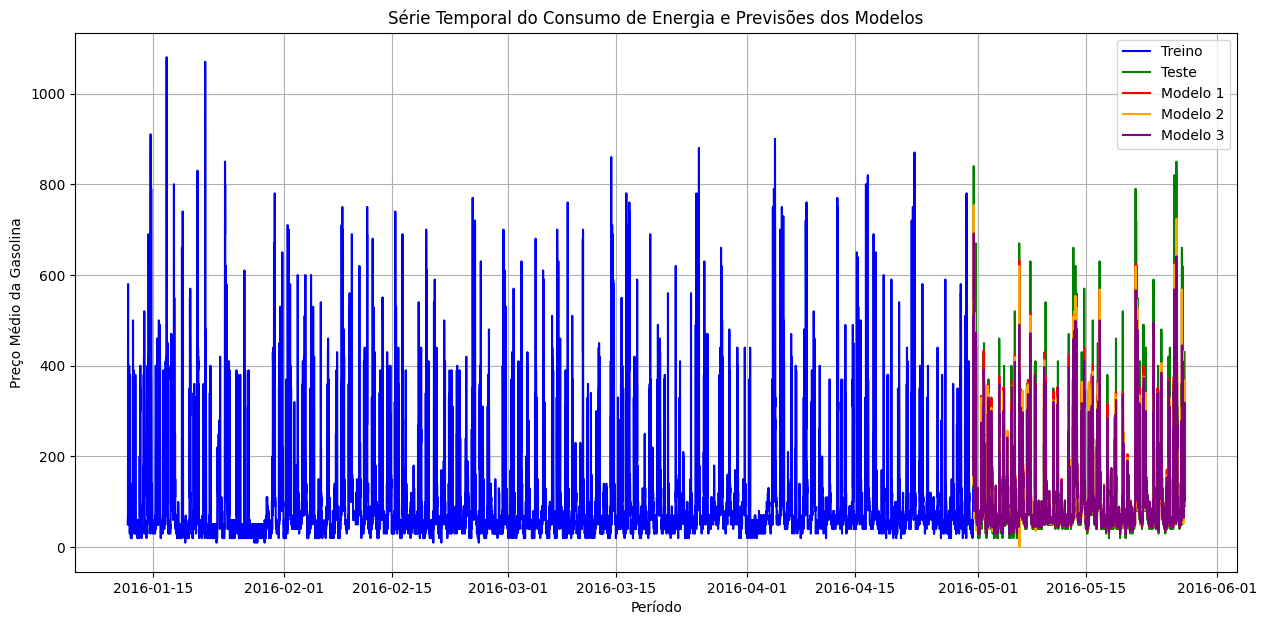

In [114]:
# Definindo o tamanho da figura para a plotagem
plt.figure(figsize=(15, 7))

# Plotando os preços médios de revenda da base de treino
plt.plot(train.index, train['Appliances'], label='Treino', color='blue')

# Plotando os preços médios de revenda da base de teste
plt.plot(test.index, test['Appliances'], label='Teste', color='green')

# Plotando as previsões dos modelos
plt.plot(test.index, y_pred1, label='Modelo 1', color='red')
plt.plot(test.index, y_pred2, label='Modelo 2', color='orange')
plt.plot(test.index, y_pred3, label='Modelo 3', color='purple')

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel('Período')
plt.ylabel('Preço Médio da Gasolina')
plt.title('Série Temporal do Consumo de Energia e Previsões dos Modelos')

# Adicionando a legenda e a grade ao gráfico
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()

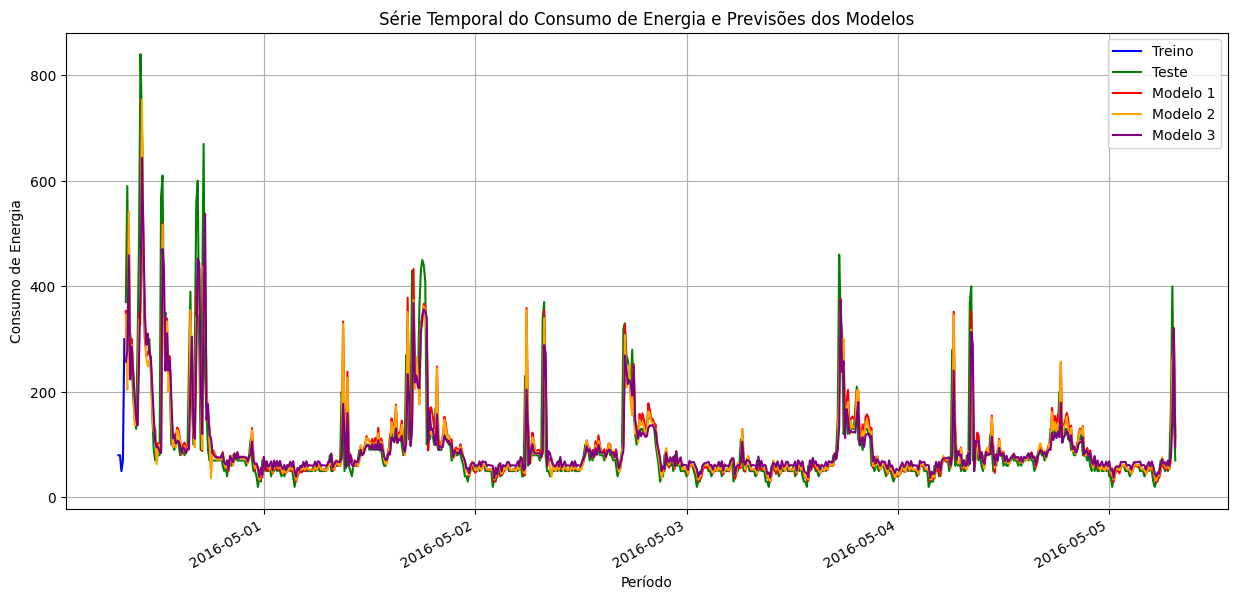

In [83]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Supondo que você quer plotar dados para um intervalo de tempo específico, por exemplo, '2023-01-01' até '2023-01-07'
start_date = '2016-04-30 07:30:00'
end_date = '2016-05-05 07:30:00'

# Filtre os dados de treino e teste para este intervalo
train_interval = train[(train.index >= start_date) & (train.index <= end_date)]
test_interval = test[(test.index >= start_date) & (test.index <= end_date)]

# Assegure-se de que os dados de previsão também estão alinhados com esse intervalo
y_pred1_interval = y_pred1[(test.index >= start_date) & (test.index <= end_date)]
y_pred2_interval = y_pred2[(test.index >= start_date) & (test.index <= end_date)]
y_pred3_interval = y_pred3[(test.index >= start_date) & (test.index <= end_date)]

# Definindo o tamanho da figura para a plotagem
plt.figure(figsize=(15, 7))

# Plotando os preços médios de revenda da base de treino
plt.plot(train_interval.index, train_interval['Appliances'], label='Treino', color='blue')

# Plotando os preços médios de revenda da base de teste
plt.plot(test_interval.index, test_interval['Appliances'], label='Teste', color='green')

# Plotando as previsões dos modelos
plt.plot(test_interval.index, y_pred1_interval, label='Modelo 1', color='red')
plt.plot(test_interval.index, y_pred2_interval, label='Modelo 2', color='orange')
plt.plot(test_interval.index, y_pred3_interval, label='Modelo 3', color='purple')

# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel('Período')
plt.ylabel('Consumo de Energia')

# Formatação do eixo x para lidar com datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.title('Série Temporal do Consumo de Energia e Previsões dos Modelos')

# Adicionando a legenda e a grade ao gráfico
plt.legend()
plt.grid(True)

# Rotação das datas no eixo x para melhor leitura
plt.gcf().autofmt_xdate()

# Mostrando o gráfico
plt.show()

## Predição utilizando Machine Learning

In [98]:
# Suponha que 'data' é o seu DataFrame e 'Appliances' é a coluna alvo

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Preparar os dados (sem a divisão aleatória)
test_size = int(len(train) * 0.2)
train_data = train[:-test_size]
test_data = train[-test_size:]

# Selecionar as características e o alvo
features = train_data.drop(['Appliances'], axis=1)  # Exclua a coluna 'date' se for uma string
target = train_data['Appliances']

# Pré-processamento: Normalização dos dados de entrada
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
test_features_scaled = scaler.transform(test_data.drop(['Appliances'], axis=1))

# Inicializar o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
model.fit(features_scaled, target)

# Fazer previsões no conjunto de teste
y_pred_ml = model.predict(test_features_scaled)

In [103]:
# Agora, y_pred_ml deve ter o mesmo tamanho que o conjunto de teste
assert len(Y-test) == len(y_pred_ml), "O número de previsões deve corresponder ao número de pontos de teste."

In [101]:
print(f'tamanho do y_test: {len(test)}')
print(f'tamanho do y_pred: {len(y_pred_ml)}')

tamanho do y_test: 3947
tamanho do y_pred: 3156


In [106]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Suponha que 'data' é o seu DataFrame e 'Appliances' é a coluna alvo
# Preparar os dados (sem a divisão aleatória)
test_size = int(len(train) * 0.2)
train_data = train[:-test_size]
test_data = train[-test_size:]

# Selecionar as características e o alvo
X_train = train_data.drop(['Appliances'], axis=1)  # Exclua a coluna 'date' se for uma string
y_train = train_data['Appliances']
X_test = test_data.drop(['Appliances'], axis=1)
y_test = test_data['Appliances']

# Pré-processamento: Padronização dos dados de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar o MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                   alpha=0.0001, batch_size='auto', learning_rate='constant', 
                   learning_rate_init=0.001, max_iter=200, random_state=42)

# Treinar o MLP
mlp.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred_mlp = mlp.predict(X_test_scaled)

/home/somnus/Documentos/git/impacta--projetos/8-semestre/data-science/prova/prova/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 1500x700 with 0 Axes>

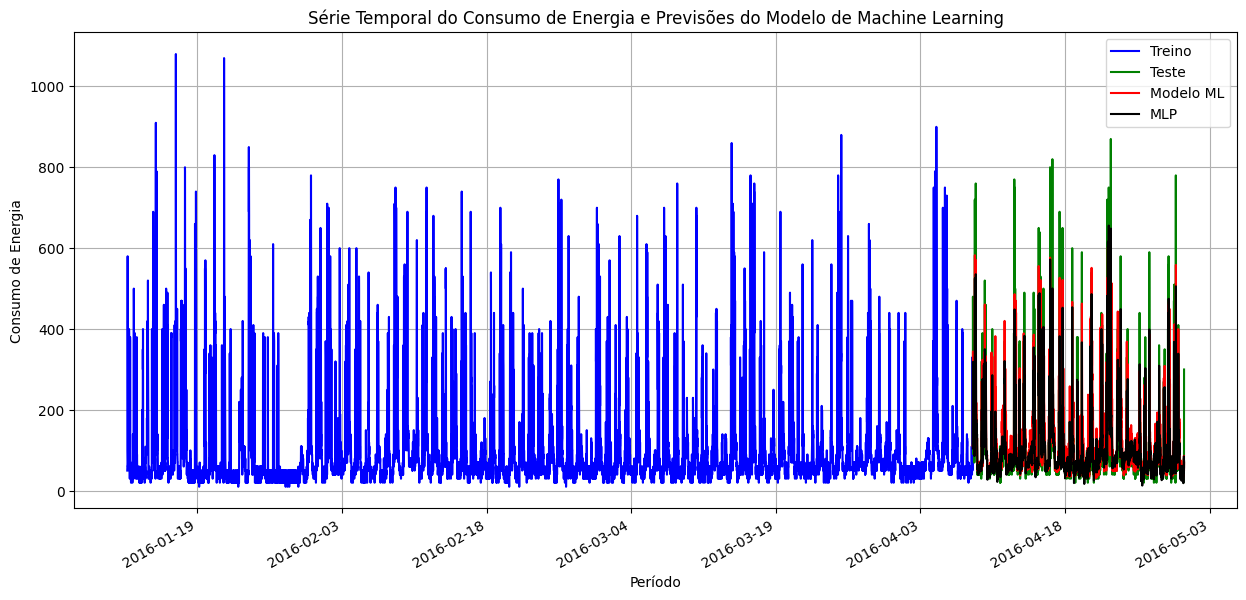

In [108]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Suponha que 'train', 'test' e 'y_pred_ml' já estão definidos e alinhados corretamente

# Definindo o tamanho da figura para a plotagem
plt.figure(figsize=(15, 7))

plt.figure(figsize=(15, 7))
plt.plot(train_data.index, train_data['Appliances'], label='Treino', color='blue')
plt.plot(test_data.index, test_data['Appliances'], label='Teste', color='green')
plt.plot(test_data.index, y_pred_ml, label='Modelo ML', color='red')
plt.plot(test_data.index, y_pred_mlp, label='MLP', color='black')


# Definindo os rótulos dos eixos e o título do gráfico
plt.xlabel('Período')
plt.ylabel('Consumo de Energia')
plt.title('Série Temporal do Consumo de Energia e Previsões do Modelo de Machine Learning')

# Formatação do eixo x para lidar com datas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Intervalo de 15 dias para as marcações de dia

# Adicionando a legenda e a grade ao gráfico
plt.legend()
plt.grid(True)

# Rotação das datas no eixo x para melhor leitura
plt.gcf().autofmt_xdate()

# Mostrando o gráfico
plt.show()
